## Partners:
#### Manisha Chandran
#### Jack McShane

# Q1 K-means clustering

## imports

In [56]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
print('fetching MNIST dataset...')
mnist = fetch_openml('mnist_784', version=1)
x = mnist.data
x.shape

fetching MNIST dataset...


(70000, 784)

In [58]:
def scale(x: np.array):
  return ((x / 255.) - .5) * 2

def to_greyscale(arr: np.array):
  return ((arr / 2.) + .5) * 255

In [59]:
# zero-centering the dataset
x_std = scale(x)

In [60]:
# sample 10k images from the dataset
samples = randint(70000, size=10000)
x_sampled = x_std[ samples ]
x_sampled.shape # verifying that have the correct dimensionality

(10000, 784)

## Determining K using the elbow method

In [61]:
nclusters_start, nclusters_stop = 1, 25
km_objs = [KMeans(n_clusters=i, init='random', random_state=42).fit(x_sampled) for i in range(nclusters_start, nclusters_stop + 1)]

In [62]:
inertias = [km_obj.inertia_ for km_obj in km_objs]
print(*inertias)

2110335.595418507 1976740.3017287117 1881563.667779901 1805335.5137044801 1735739.47616763 1688619.5187416815 1651696.3662550612 1619091.7655077078 1593196.9018665988 1563727.533584048 1538984.153315217 1520595.0862117293 1499410.0881131126 1482062.5872662722 1464659.5661889054 1449095.8198162862 1434826.7588445863 1422100.5087582078 1410536.1146577534 1399650.9951980775 1388911.9044211407 1379865.484054945 1369473.2803207429 1361950.9523771785 1353302.2443083292


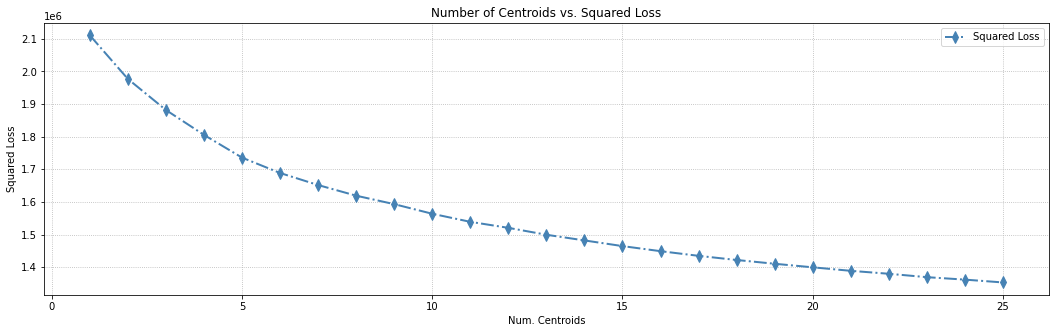

In [63]:
# plotting squared loss
%matplotlib inline

fig, ax = plt.subplots(figsize=(18,5))
centroids = range(nclusters_start, nclusters_stop + 1)
ax.set_title('Number of Centroids vs. Squared Loss')
ax.set_xlabel('Num. Centroids')
ax.set_ylabel('Squared Loss')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(centroids, inertias, label='Squared Loss', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()


#### Determining K:
---
<p> Determining the value for K (the number of clusters) for the dataset was difficult for this problem.  When using the elbow method as above, you generally hope to find a steep decline in the graph followed by a much more gradual decline.  That is not what we get in the graph above.  We tried all possible combinations of sampling, dimensionality reduction (using PCA), normalization, and standardization on the dataset. We varied the number of samples from 10k to 40k as well as varied the dimensionality reduction to feature spaces between 20x20 and 14x14. Nonetheless, the graphs stayed largely the same for each of these approaches.</p>
<p>From the graph above, it would seem reasonable to me to choose a value of K anywhere from 10 to 20 clusters as the particularly steep drop off slows after 10 and all but dies out after 30.  One possibility for this is that there could very well be overlap between digits such as 0 and 8, 3 and 8, or 1 and 7. In this assignment, because we know something of the dataset (namely that there are 10 unique classes of digits in the dataset), we decided to use 10 clusters for performing K-means clustering.</p>

In [64]:
kmeans = KMeans(n_clusters=10, init='random', random_state=42).fit(x_sampled)

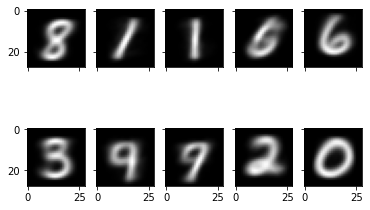

In [65]:
# plot the different centroids
centroids = to_greyscale(kmeans.cluster_centers_)
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i, cent in enumerate(centroids):
  img = cent.reshape(28,28)
  ax[i].imshow(img, cmap='gray')

#### Discuss the centroids
---
The clusters for the random initialization are not terrible, but certainly aren't as clear or as accurate as we would expect. Certainly there are some (such as 8, 1, 6, 3, 2, and 0) that seem to be fairly accurate regarding representation, but the others seem to have found some medium between classes. The second cluster seems to have overlap between 1's and 7's. the 4th cluster in the graph is a jumbled mess but if I had to guess, I would say it has overlap between 5 certainly and either 8's 0's or perhaps both. The 6th cluster is largely representative of 3's but seems to have a bit of overlap with 8's. Finally, the eighth cluster seems to have overlap between images of both 7's and 9's funny enough.

## K-means clustering (kmeans++ init)

In [66]:
kmplus_objs = [KMeans(n_clusters=i, random_state=42).fit(x_sampled) for i in range(nclusters_start, nclusters_stop + 1)]

In [67]:
inertias = [km_obj.inertia_ for km_obj in kmplus_objs]
print(*inertias)

2110335.595418507 1976739.1182996542 1881557.2446353333 1805336.4430131381 1735738.9187965724 1688626.147261172 1651695.404765476 1619093.4989226386 1589838.4874142162 1563702.0092947439 1538931.8391256442 1517924.9051970136 1499554.953726631 1480490.5686870154 1464618.9295870059 1450352.7762444823 1434971.8699578077 1422988.3632459203 1413717.9609568208 1399809.1426737208 1387562.8990603634 1378508.4704358566 1369265.253921765 1360211.1967133137 1352175.9074279696


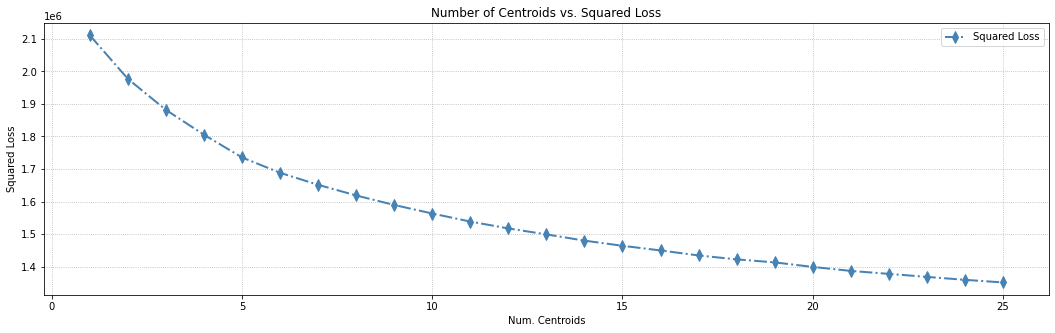

In [68]:
# plotting squared loss
%matplotlib inline

fig, ax = plt.subplots(figsize=(18,5))
centroids = range(nclusters_start, nclusters_stop + 1)
ax.set_title('Number of Centroids vs. Squared Loss')
ax.set_xlabel('Num. Centroids')
ax.set_ylabel('Squared Loss')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(centroids, inertias, label='Squared Loss', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()


#### Choosing K:
---
<p> The situation for the situation for the kmeans++ initialization was much the same as that above. We tried the same variations in data preparation and kernel number with nearly matchin graphs.  Due to this, and the knowledge we have of the dataset, we again chose to use 10 clusters when performing kmeans.</p>

In [69]:
kmplus = KMeans(n_clusters=10, random_state=42).fit(x_sampled)

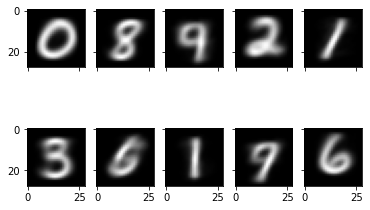

In [70]:
# show the centroids for each of the clusters (probably have to rescale to greyscale values)
centroids = to_greyscale(kmplus.cluster_centers_)
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i, cent in enumerate(centroids):
  img = cent.reshape(28,28)
  ax[i].imshow(img, cmap='gray')


#### Discuss the centroids
---
Once again, there seems to be a large amount of overlap between 5 and other classes, so much so that the cluster most closely representative of 5's is hardly representative at all. The 7's in the dataset seems to be overlapping quite a bit with both 1's and 9's as was seen in from the clusters produced by the algorithm using random initialization as well.

## Using an image from each class for the 10 centroids

In [71]:
y = mnist.target[samples].astype(int)
centroids = list() # holds the index for the centroid of each class
for i in range(10):
  matchlist = [ind for ind, x in enumerate(y==i) if x]
  centroids.append(matchlist[0])


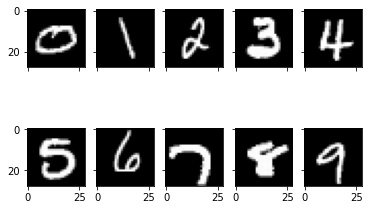

In [72]:
# grab and display an image from each class (the initial centroids)
scaled_images = np.array([x_sampled[c] for c in centroids])

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
  img = to_greyscale(scaled_images[i]).reshape(28,28)
  ax[i].imshow(img, cmap='gray')

In [79]:
# run k-means using these images as the clusters
km_handpicked = KMeans(n_clusters=10, init=scaled_images, n_init=1, random_state=42).fit(x_sampled)

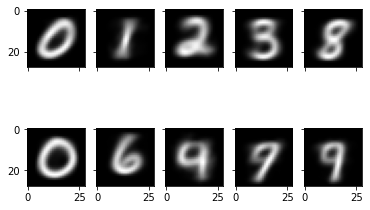

In [80]:
# display the new clusters resulting from the kmeans
centroids = to_greyscale(km_handpicked.cluster_centers_)
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i, cent in enumerate(centroids):
  img = cent.reshape(28,28)
  ax[i].imshow(img, cmap='gray')

#### Discuss the centroids
---
<p>In this case, the produced clusters are very far from representative of the originals. I would contribute this to the fact that this original set of clusters was very "hairy" and overall not very representative itself, hence a great deal of overlap between various resulting clusters.  It seems completely understandable to me that the 6th centroid ended up being more representative of a 0 than a 5 given its starting point.  I think the same can be said of the centroids initially representative of 7's or 8's too.  What I do think would fix this issue though, at least somewhat, would be more careful picking of the initial centroids.  If one were to go through the various photos for the different classes and pick images that seemed to them rather representative, you might end up with more representative centroids. That in itself, however, would also add bias to the model.</p>
<p>As for a comparison between the approaches, I think that, in this instance, the handpicked centroids performed by far the worst (although this may not always be the case).  Between the first two approaches, I find it hard to determine which performed better.  Personally, I would pick the second approach because it seems to me that the cluster that is supposed to represent 5's is ever so slightly darker between the top of the five and the top of the loop underneath. </p>

In [82]:
# compute and display the variance of each of the three approaches
(int(kmeans.inertia_), int(kmplus.inertia_), int(km_handpicked.inertia_))

(1563727, 1563702, 1569704)

The calculated variance of each of the models makes it a little clearer how each performed.  As was mentioned above, the third approach most certainly performed the worst.  Beyond that, you can see that the first and second approaches were really neck and neck. There is very little difference between the degree of variance in each model.  Empirically, it seems that the second approach performed better than the first (as would theoretically be expected), but personally, I find it almost impossible to differentiate visually.

RESOURCES:
1) Hands-On Machine Learning with Scikit-Learn and TensorFlow Textbook
</br>2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
</br>3)https://numpy.org/


In [ ]:
import keras
import sklearn
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from numpy import vstack
from numpy import argmax
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 


**Divide** **the** **MNIST** **dataset** **into** **a** **training** **and** **a** **testing** **set** **using** **60,000** **images** **for** **training** **and**
**the** **remaining** **for** **testing**.

In [ ]:
mnist_dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train,Y_train), (X_test,Y_test) = mnist_dataset
timet = []

In [ ]:
X_train = X_train.reshape(X_train.shape[0],784) 
X_test =  X_test.reshape(X_test.shape[0],784)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


**Train** **a** **Random** **Forest** **classifier** **using** **the** **training** **data** **and** **evaluate** **how** **long** **it** **takes** **to**
**train**. 

In [ ]:
random_clf = RandomForestClassifier(n_estimators=100, max_depth=None)

In [ ]:
t0 = time.time()
random_clf.fit(X_train, Y_train)
t1 = time.time()
time_taken = (t1 - t0)

In [ ]:
time_taken

47.5067195892334

**Test** **the** **classifier** **with** **the** **testing** **data** **and** **generate** **a** **confusion** **matrix** **and** **compute** **the**
**overall** **accuracy.** 

In [ ]:
y_pred = random_clf.predict(X_test)
print('Accuracy score: ',accuracy_score(Y_test, y_pred))

Accuracy score:  0.9688


In [ ]:
cm = confusion_matrix(y_pred, Y_test)
print(cm)

[[ 971    0    5    1    1    3    5    1    4    6]
 [   0 1124    0    0    0    0    3    2    0    5]
 [   1    3 1002   11    2    2    0   21    3    1]
 [   0    2    7  968    0   11    0    0    5   11]
 [   0    0    2    0  949    2    3    2    5   14]
 [   2    2    0    8    0  860    4    0    8    3]
 [   2    2    3    0    5    5  940    0    4    1]
 [   1    1    8    9    0    1    0  988    4    4]
 [   3    1    5    9    2    4    3    2  929    7]
 [   0    0    0    4   23    4    0   12   12  957]]


**Using** **PCA** **to** **reduce** **the** **dataset’s** **dimensionality**, **using** **explained** **variance** **ratio’s** **of:** **95%**

In [ ]:
(X_train,Y_train), (X_test,Y_test) = mnist_dataset
X_train = X_train.reshape(X_train.shape[0],784) 
X_test =  X_test.reshape(X_test.shape[0],784)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
random_clf2 = RandomForestClassifier(n_estimators=100, max_depth=None)
t0 = time.time()
random_clf2.fit(X_train_reduced, Y_train)
t1 = time.time()
time_taken = (t1-t0)

In [ ]:
timet.append(round(t1-t0,4))
time_taken

126.17418169975281

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = random_clf2.predict(X_test_reduced)
accuracy_score(Y_test, y_pred)

0.9497

In [ ]:
cm1 = confusion_matrix(y_pred, Y_test)
print(cm1)

[[ 965    1   10    2    1    7   10    0    7    7]
 [   0 1118    0    0    2    1    4    7    0    6]
 [   3    2  974    6    5    1    1   21    8    3]
 [   0    4   10  960    0   26    0    2   26   15]
 [   0    0    3    0  941    6    3   10   14   22]
 [   1    0    0   12    2  831    3    0   18    2]
 [   5    7    3    2    6    8  937    0    5    1]
 [   2    1    6    8    0    4    0  962    5   13]
 [   4    2   25   15    4    5    0    6  879   10]
 [   0    0    1    5   21    3    0   20   12  930]]


**Using** **PCA** **to** **reduce** **the** **dataset’s** **dimensionality**, **using** **explained** **variance** **ratio’s** **of:** **90%**

In [ ]:
(X_train,Y_train), (X_test,Y_test) = mnist_dataset
X_train = X_train.reshape(X_train.shape[0],784) 
X_test =  X_test.reshape(X_test.shape[0],784)

In [ ]:
pca = PCA(n_components=0.90, svd_solver='full')
X_train_reduced_90 = pca.fit_transform(X_train)

In [ ]:
random_clf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
t0 = time.time()
random_clf3.fit(X_train_reduced_90, Y_train)
t1 = time.time()
time_taken = (t1-t0)

In [ ]:
timet.append(round(t1-t0,4))
time_taken

95.48549032211304

In [ ]:
X_test_reduced_90 = pca.transform(X_test)

y_pred = random_clf3.predict(X_test_reduced_90)
accuracy_score(Y_test, y_pred)

0.952

In [ ]:
cm2 = confusion_matrix(y_pred, Y_test)
print(cm2)

[[ 965    0   11    2    0    5    7    0    7    6]
 [   0 1119    0    0    1    1    4    5    0    6]
 [   3    4  970    6    4    3    2   16   13    1]
 [   0    4   13  956    0   17    1    1   22   11]
 [   0    0    5    0  939    4    3    5    8   32]
 [   2    0    2   16    2  842    4    1   17    6]
 [   6    4    4    1    6   10  937    0    3    1]
 [   1    1    6    8    2    2    0  979    7   11]
 [   3    3   20   15    2    4    0    3  887    9]
 [   0    0    1    6   26    4    0   18   10  926]]


**Using** **PCA** **to** **reduce** **the** **dataset’s** **dimensionality**, **using** **explained** **variance** **ratio’s** **of:** **85%**

In [ ]:
(X_train,Y_train), (X_test,Y_test) = mnist_dataset
X_train = X_train.reshape(X_train.shape[0],784) 
X_test =  X_test.reshape(X_test.shape[0],784)

In [ ]:
pca = PCA(n_components=0.85, svd_solver='full')
X_train_reduced_85 = pca.fit_transform(X_train)

In [ ]:
random_clf4 = RandomForestClassifier(n_estimators=100, max_depth=None)
t0 = time.time()
random_clf4.fit(X_train_reduced_85, Y_train)
t1 = time.time()

In [ ]:
timet.append(round(t1-t0,4))
(t1 - t0)

72.88501834869385

In [ ]:
X_test_reduced_85 = pca.transform(X_test)

y_pred = random_clf4.predict(X_test_reduced_85)
accuracy_score(Y_test, y_pred)

0.9548

In [ ]:
cm3 = confusion_matrix(y_pred, Y_test)
print(cm3)

[[ 965    0    7    1    0    4    6    0    5    3]
 [   0 1119    0    0    1    1    3    6    0    6]
 [   3    3  973    7    4    3    0   17    9    2]
 [   0    4   13  957    0   16    0    2   17   14]
 [   0    0    7    1  936    4    5    6   11   21]
 [   4    0    1   14    3  847    3    1   16    4]
 [   6    4    4    2   10    7  941    0    4    2]
 [   1    0   10    7    2    1    0  972    6    8]
 [   1    4   17   17    3    5    0    2  899   10]
 [   0    1    0    4   23    4    0   22    7  939]]


<h2>Influence of variance ratio:</h2>
<table style="width:100%">
  <tr>
    <th>Initial Training Time</th>
    <th>95% Variance Training Time</th>
    <th>90% Variance Training Time</th>
    <th>85% Variance Training Time</th>
  </tr>
  <tr>
    <td>47.506719 secs</td>
    <td>126.174181 secs</td>
    <td>95.485490 secs</td>
    <td>72.88501 secs</td>
  </tr>
</table>
<h2>Reasoning</h2>
<p>It can be seen that training time does not really decrease with dimensionality reduction rather it is increasing and then decreasing by some small factor, it is so because dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.</p>
<p>If we use some other classifier like Softmax Classifier instead of Random Forest Classifier then we might see some decrease in training time</p>


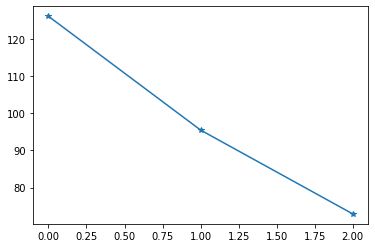

In [ ]:
plt.plot(timet,'-*')

<h2>Performance Differences:</h2>
<table style="width:100%">
  <tr>
    <th>Initial Performance Accuracy</th>
    <th>95% variance Accuracy </th>
    <th>90% Variance Accuracy</th>
    <th>85% Variance Accuracy</th>
  </tr>
  <tr>
    <td>96.88%</td>
    <td>94.97%</td>
    <td>95.2%</td>
    <td>95.48%</td>
  </tr>
</table>
<h2>Reasoning</h2>
<p>It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe that is approximately 2% in all the three cases as compared to initial performance accuracy.</p>
<p>So PCA really did not help: it slowed down training and reduced performance.</p>
